<hr style="border: 2px solid #8E7B6B; margin-top: 10px;">

<br>
<h1 style="font-family:verdana; font-size:26px"> <center>~ Notebook Tugas Besar 2 IF3170 Artificial Intelligence ~</center> </h1>
<br>

<hr style="border: 2px solid #8E7B6B; margin-top: 10px;">

# **SatuWardaEmpatBeban**
## Kelompok ...
<p style = "font-size:16px; font-family:verdana">- Wardatul Khoiroh (13523001)<p>

<p style = "font-size:16px; font-family:verdana">- Raka Daffa Iftikhaar (13523018) <p>

<p style = "font-size:16px; font-family:verdana">- Muhammad Fithra Rizki (13523049) <p>

<p style = "font-size:16px; font-family:verdana">- Ahsan Malik Al Farisi (13523074) <p>
    
<p style = "font-size:16px; font-family:verdana">- Farrel Athalla Putra (13523118) <p>

<br>

<hr style="border: 2px solid #8E7B6B; margin-top: 10px;">

# Daftar Isi

1. [**Introduction**](#1)

2. [**Initialization**](#2)

3. [**Exploratory Data Analysis**](#3)

4. [**Data Cleaning & Preprocessing**](#4)

5. [**Modelling**](#5)

6. [**Model Comparison & Evaluation**](#6)

7. [**Error Analysis**](#7)

8. [**Conclusion**](#8)

<hr style="border: 2px solid #8E7B6B; margin-top: 10px;">

# Introduction <a name="1"></a>

<hr style="border: 2px solid #8E7B6B; margin-top: 10px;">

## Machine Learning Classification on Student Academic Dataset

*Dataset mahasiswa yang digunakan dalam tugas besar ini berisi informasi demografis, faktor sosial-ekonomi, serta performa akademik. Data tersebut menyediakan landasan yang relevan untuk menganalisis pola serta faktor-faktor yang berpotensi memengaruhi hasil akademik mahasiswa.*

*Dalam tugas besar ini, beberapa algoritma machine learning diterapkan, termasuk Decision Tree Learning (DTL), Logistic Regression, dan Support Vector Machine (SVM), baik melalui implementasi manual (from scratch) maupun menggunakan pustaka scikit-learn. Proses ini mencakup tahap preprocessing, training, evaluasi, serta perbandingan performa antar metode.*

*Tujuan utama dari eksperimen ini adalah membangun model yang mampu melakukan prediksi secara akurat berdasarkan fitur yang tersedia. Selain itu, hasil analisis ini diharapkan dapat memberikan insight yang berguna dalam mendukung keputusan berbasis data dalam konteks pendidikan, terutama terkait peningkatan strategi belajar dan pengelolaan akademik.*

---

## Dataset

*Data bersumber dari dataset yang tersedia di platform Kaggle, khususnya dari kompetisi Data Mining Hology 8.0 dengan pranala: https://www.kaggle.com/competitions/if-3170-tugas-besar-2-student-performance/data .*

*Dataset ini berisi 3098 baris data train serta 1328 baris data test berisi statisik mahasiswa pada proses akademik*

*Dataset ini akan digunakan untuk melatih dan menguji model AI melakukan multiclass classification status kelulusan mahasiswa.*

<br>


```latex
data
│
├── train.csv                            # berisi data untuk pelatihan
│
├── test.csv                             # berisi data untuk evaluasi
│
├── sample_submission.csv                # referensi .csv untuk submisi
│  
└── if-3170-tugas-besar-2-student-performance.zip
```

<br>

<hr style="border: 2px solid #8E7B6B; margin-top: 10px;">

# Initialization <a name="2"></a>

<hr style="border: 2px solid #8E7B6B; margin-top: 10px;">

## Import Libraries

In [52]:
# Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math
import matplotlib.ticker as mtick

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

<hr style="border: 2px solid #8E7B6B; margin-top: 10px;">

# Exploratory Data Analysis <a name="3"></a>

<hr style="border: 2px solid #8E7B6B; margin-top: 10px;">

Dilakukan EDA terhadap dataset untuk mengetahui bentuk data, kebersihan data, serta sifat dan interaksi setiap fitur pada data

In [ ]:
# Load data (use relative path for local development)
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")

print(f"Train shape: {train_df.shape}")
print(f"Test shape: {test_df.shape}")

In [26]:
train_df.head()

,Student_ID,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,3743,1,17,1,9670,1,1,118.0,1,19,38,7,9,113.5,1,0,0,1,0,1,19,0,0,6,9,5,13.500000,0,0,6,6,6,14.000000,0,12.4,0.5,1.79,Graduate
1,3540,1,1,1,9070,1,1,139.0,1,1,19,3,9,134.9,1,0,0,1,1,0,20,0,0,6,7,6,13.666667,0,0,6,7,6,12.166667,1,16.2,0.3,-0.92,Graduate
2,1118,1,1,1,9500,1,1,138.0,1,38,19,9,5,144.3,0,0,0,1,0,0,20,0,0,7,9,6,12.700000,0,0,8,8,7,13.571429,0,13.9,-0.3,0.79,Graduate
3,791,1,17,1,9773,1,1,138.0,1,1,19,9,9,124.0,0,0,0,1,0,1,19,0,0,6,6,6,13.166667,0,0,6,6,6,13.833333,0,11.1,0.6,2.02,Graduate
4,4381,1,7,1,9500,1,2,140.0,1,38,37,7,8,140.0,0,0,0,1,0,0,29,0,0,8,14,4,11.325000,1,0,8,14,4,11.325000,1,12.7,3.7,-1.70,Dropout


In [27]:
train_df.Target.unique()

array(['Graduate', 'Dropout', 'Enrolled'], dtype=object)

> ### Insight
Akan dilakukan prediksi terhadap target variable berisikan 3 kategori kelulusan, yaitu Graduate, Dropout, dan Enrolled

In [28]:
train_df.columns

Index(['Student_ID', 'Marital status', 'Application mode', 'Application order',
       'Course', 'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curric

> ### Insight
Terdapat nama kolom kotor, yaitu Daytime/evening attendance\t serta typo pada Nacionality (asumsi seharusnya Nationality). Ini harus diperhatikan pada penggunaan kolom nanti

In [29]:
train_df.shape

(3096, 38)

In [34]:
train_df.isnull().sum()

Student_ID                                        0
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship 

In [35]:
test_df.isnull().sum()

Student_ID                                        0
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship 

> ### Insight
Data train serta test sudah bersih terhadap missing values. Sehingga di masa depan tidak perlu melakukan penanganan imputasi pada data

In [36]:
train_df.duplicated().sum()

0

In [37]:
test_df.duplicated().sum()

0

> ### Insight
Data train serta test juga sudah bersih terhadap duplicate rows sehingga tidak perlu melakukan drop duplicate values

In [19]:
train_df.describe()

,Student_ID,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.00000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000,3096.000000
mean,2201.759690,1.166021,18.372416,1.717700,8832.330749,0.89438,4.672804,132.762435,1.797158,19.361111,22.146641,10.536176,10.743863,126.915698,0.548450,0.011951,0.110142,0.880814,0.354328,0.252584,23.216408,0.023256,0.713501,6.245801,8.242571,4.697674,10.621631,0.140181,0.539729,6.201227,8.015181,4.410853,10.179772,0.141150,11.580749,1.209076,0.006570
std,1275.008676,0.573701,17.456612,1.292362,2116.515003,0.30740,10.387415,13.137942,6.781964,15.568871,15.329250,25.028462,24.464090,14.459928,0.497727,0.108683,0.313117,0.324060,0.478386,0.434565,7.614394,0.150739,2.365945,2.501305,4.186787,3.087995,4.880632,0.672843,1.906634,2.223507,3.966593,3.022767,5.260617,0.718398,2.659685,1.380070,2.268175
min,1.000000,1.000000,1.000000,0.000000,33.000000,0.00000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1102.750000,1.000000,1.000000,1.000000,9085.000000,1.00000,1.000000,125.000000,1.000000,2.000000,3.000000,4.000000,4.000000,117.800000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,2212.000000,1.000000,17.000000,1.000000,9238.000000,1.00000,1.000000,133.100000,1.000000,19.000000,19.000000,5.000000,7.000000,126.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.333333,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,3303.750000,1.000000,39.000000,2.000000,9556.000000,1.00000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,9.000000,135.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,25.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,4424.000000,6.000000,57.000000,9.000000,9991.000000,1.00000,43.000000,190.000000,108.000000,44.000000,44.000000,194.000000,195.000000,190.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,1.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3096 entries, 0 to 3095
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Student_ID                                      3096 non-null   int64  
 1   Marital status                                  3096 non-null   int64  
 2   Application mode                                3096 non-null   int64  
 3   Application order                               3096 non-null   int64  
 4   Course                                          3096 non-null   int64  
 5   Daytime/evening attendance	                     3096 non-null   int64  
 6   Previous qualification                          3096 non-null   int64  
 7   Previous qualification (grade)                  3096 non-null   float64
 8   Nacionality                                     3096 non-null   int64  
 9   Mother's qualification                   

> ### Insight
Perhatikan bahwa berdasarkan Deskripsi Dataset Tubes 2 IF3170 menyatakan bahwa banyak kolom merupakan kategorical, namun sudah di convert ke numerical. Disini jangan sampai meng-*treat* fitur kategorical tersebut seperti numerikal biasa karena akan melenceng dari *purpose* dan *intended* fitur tersebut.

### 1. Cek Imbalance Target

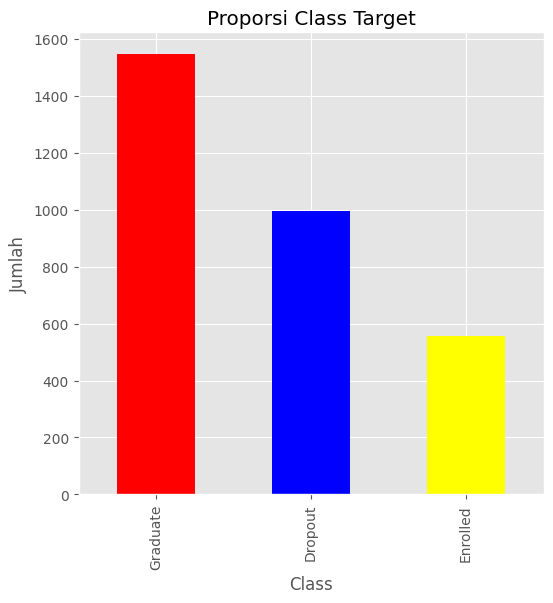

In [48]:
train_df['Target'].value_counts().plot.bar(
    figsize=(6,6),
    color=['red', 'blue', 'yellow']
)

plt.title("Proporsi Class Target")
plt.xlabel("Class")
plt.ylabel("Jumlah")
plt.show()

## 2. Cek Outlier pada Fitur Numerikal

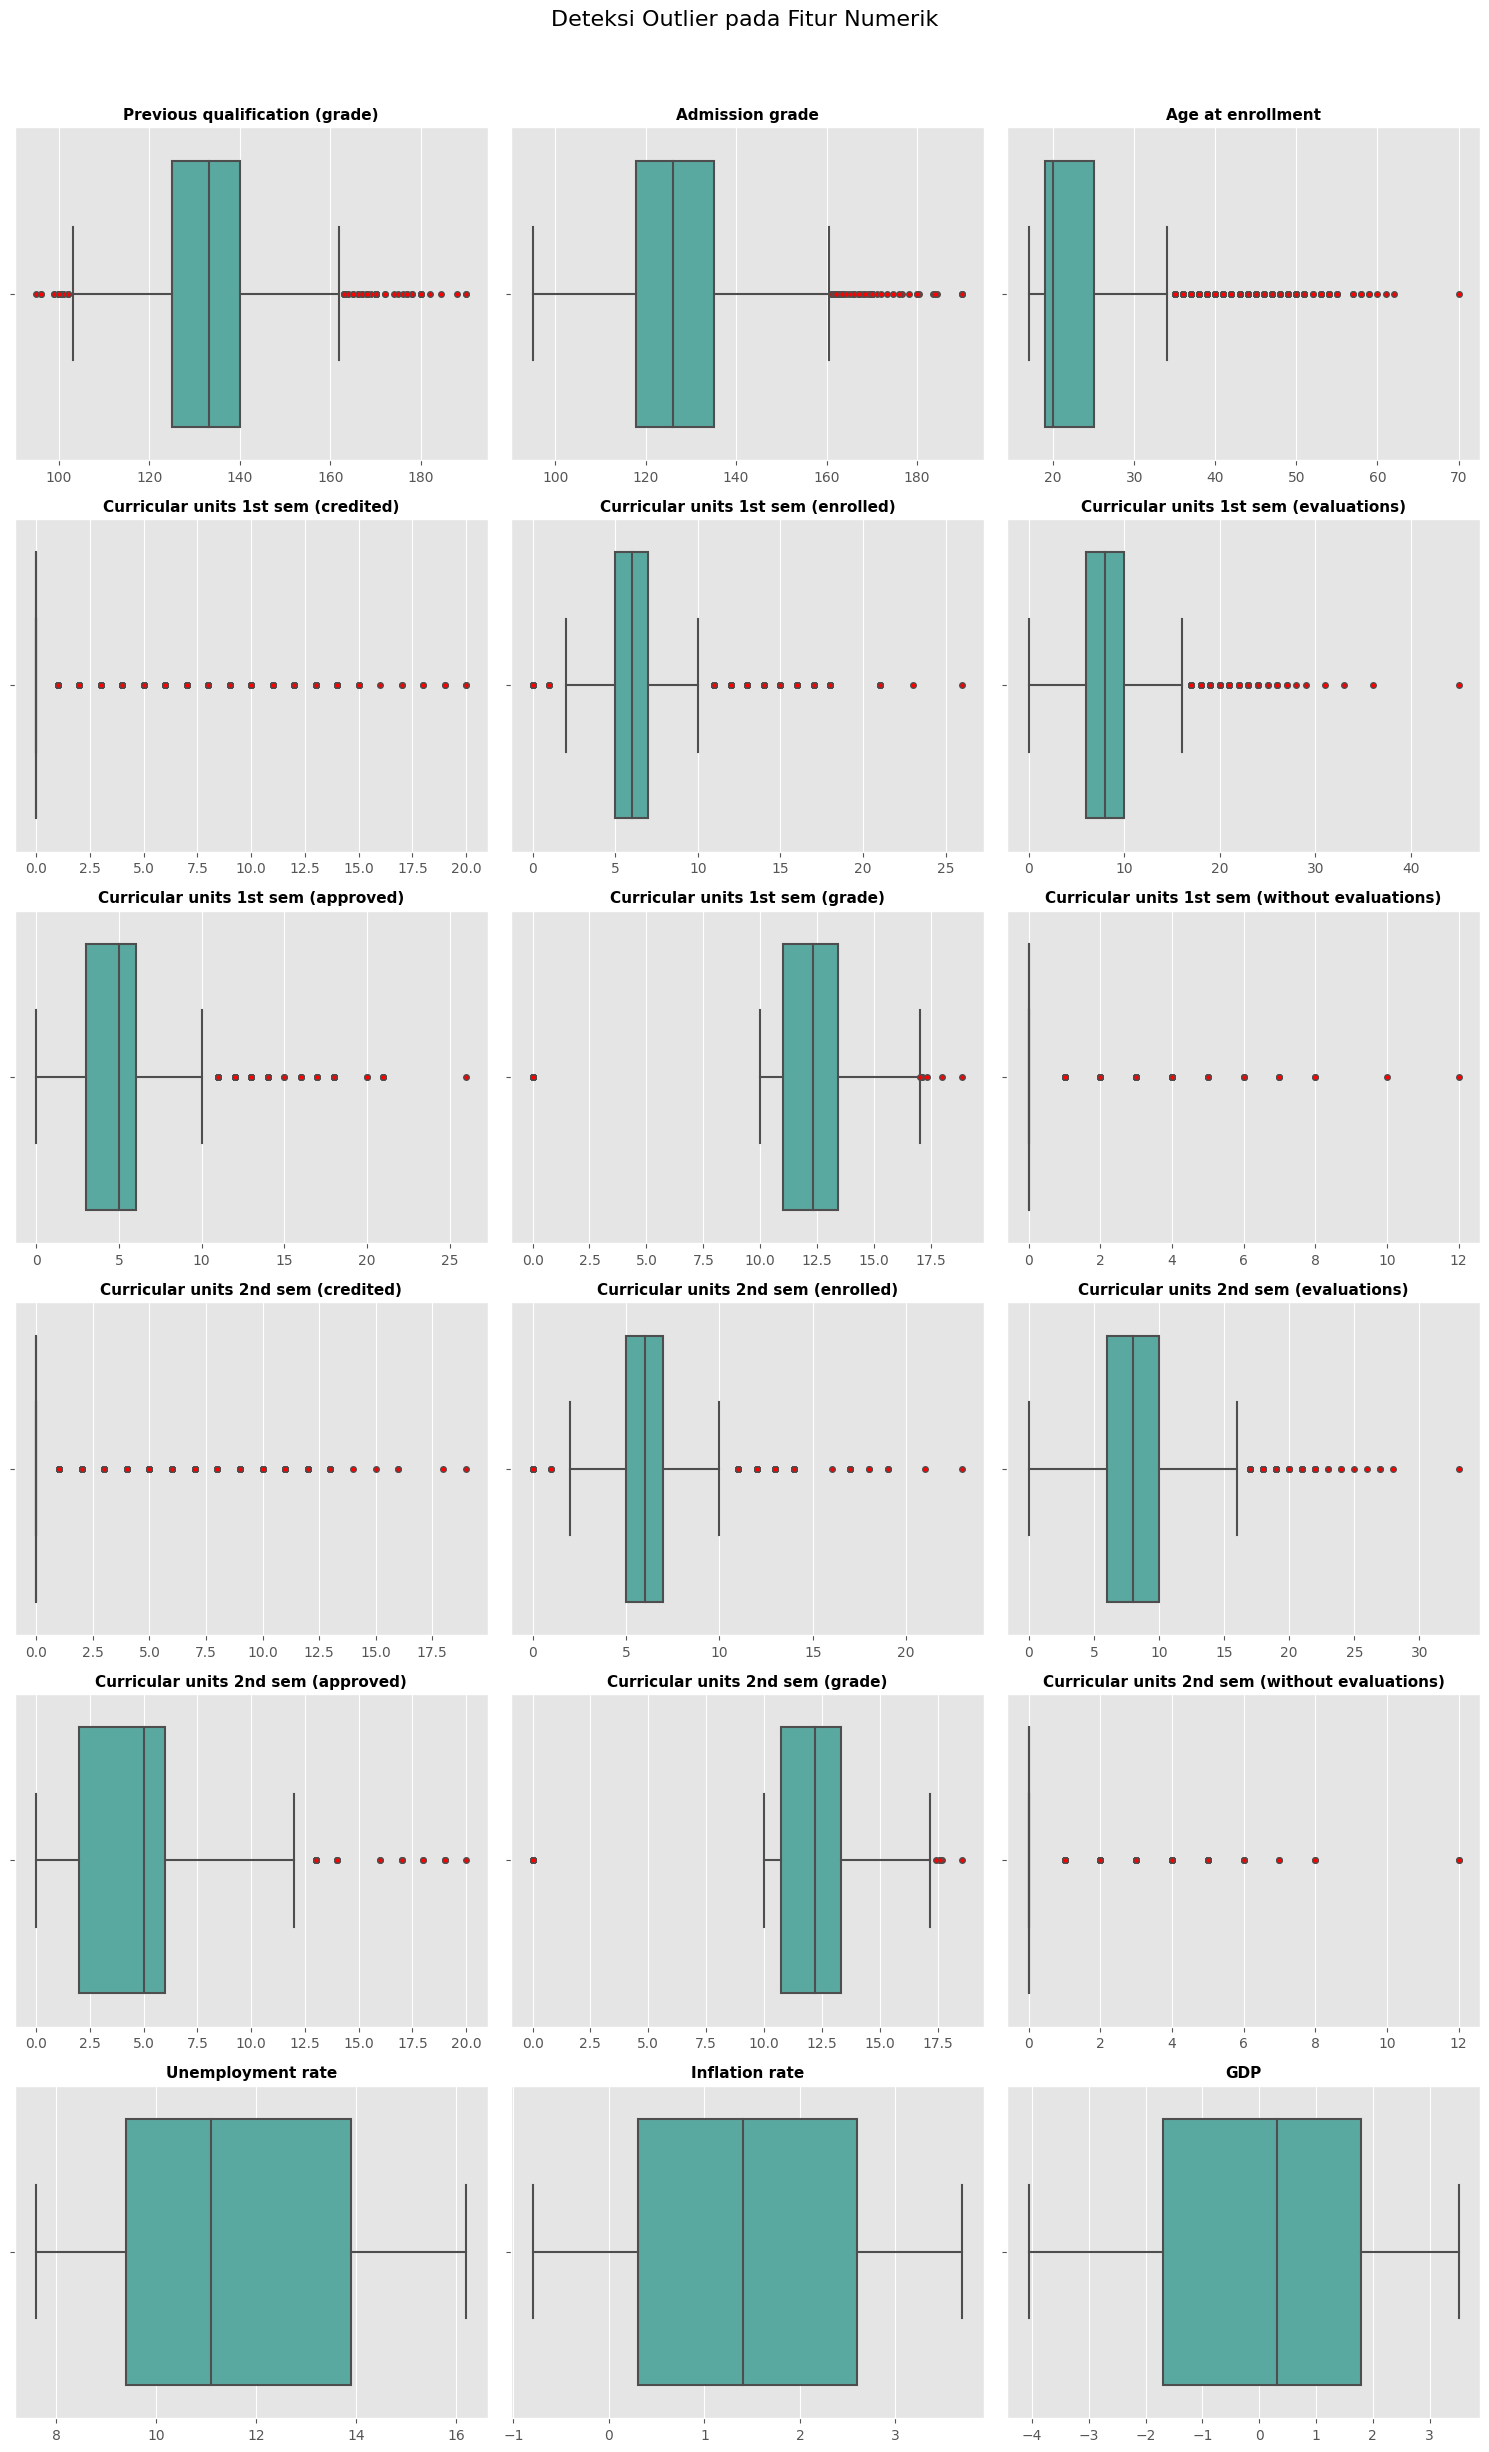

In [47]:
numeric_cols = [
    # Data Nilai & Kualifikasi Sebelumnya
    'Previous qualification (grade)',
    'Admission grade',
    'Age at enrollment',
    
    # Data Akademik Semester 1
    'Curricular units 1st sem (credited)',
    'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)',
    'Curricular units 1st sem (without evaluations)',
    
    # Data Akademik Semester 2
    'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)',
    'Curricular units 2nd sem (without evaluations)',
    
    # Data Makro Ekonomi
    'Unemployment rate',
    'Inflation rate',
    'GDP'
]

selected_cols = [col for col in numeric_cols if col in train_df.columns]

num_features = len(selected_cols)
cols_per_row = 3
rows = math.ceil(num_features / cols_per_row)

plt.figure(figsize=(15, 4 * rows)) 
for i, col in enumerate(selected_cols):
    plt.subplot(rows, cols_per_row, i + 1)
    sns.boxplot(x=train_df[col], color='#4db6ac', flierprops={"marker": "o", "markerfacecolor": "red", "markersize": 4})
    plt.title(col, fontsize=11, fontweight='bold')
    plt.xlabel('')

plt.suptitle('Deteksi Outlier pada Fitur Numerik', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

> ### Insights
- Age at enrollment merupakan fitur dengan outlier terbanyak. Dari gambar, dapat dilihat bahwa rata-rata usia pada rentang 18-22 tahun, namun terdapat outlier hingga 70 tahun.
- Previous qualification (grade) & Admission grade memiliki outlier namun tidak separah itu. Median di sekitar 120-130.
- Fitur yang berkaitan dengan performa mahasiswa selama semester 1 dan 2 secara standar mengambil sekitar 5-7 mata kuliah. Namun, ada outlier di mana mahasiswa mengambil 15–20 mata kuliah (Enrolled) atau mengikuti 30+ evaluasi (Evaluations).
- Pada variabel Grade, terdapat outlier di angka 0. Pada Approved, outlier nol juga terlihat.
- Unemployment rate, Inflation rate, GDP sedikit outlier, berarti ekonomi stabil

## 3. Mata Kuliah Sulit

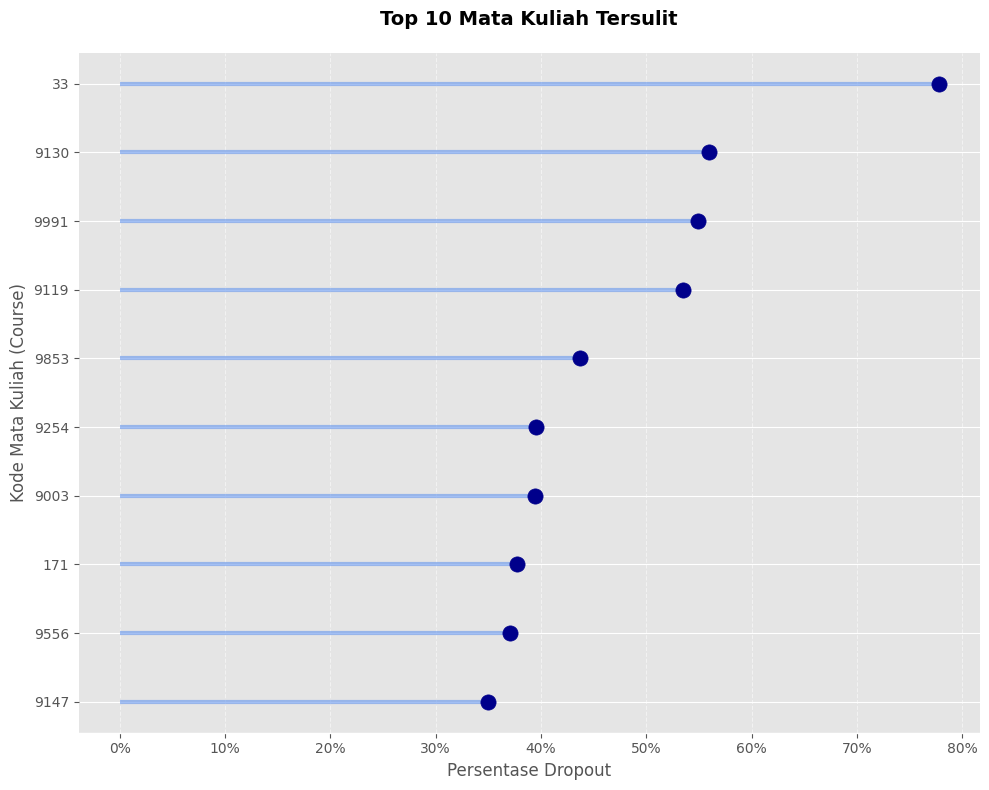

In [56]:
train_df['is_dropout'] = (train_df['Target'] == 'Dropout').astype(int)
course_stats = train_df.groupby("Course")["is_dropout"].mean()

top_10_courses = course_stats.sort_values(ascending=False).head(10).sort_values(ascending=True)

plt.figure(figsize=(10, 8))

y_range = range(len(top_10_courses))

plt.hlines(y=y_range, xmin=0, xmax=top_10_courses.values, 
           color='cornflowerblue', alpha=0.6, linewidth=3)

plt.scatter(top_10_courses.values, y_range, 
            color='darkblue', s=120, alpha=1, zorder=3)

plt.yticks(y_range, top_10_courses.index.astype(str), fontsize=10)
plt.title("Top 10 Mata Kuliah Tersulit", fontsize=14, fontweight='bold', pad=20)
plt.xlabel("Persentase Dropout", fontsize=12)
plt.ylabel("Kode Mata Kuliah (Course)", fontsize=12)

plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1.0))

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

> ### Insight
Mata kuliah berpengaruh terhadap kemungkinan dropout. Berarti ada tingkat kesulitan yang berbeda signifikan antar mata kuliah

## 4. Korelasi antar Fitur

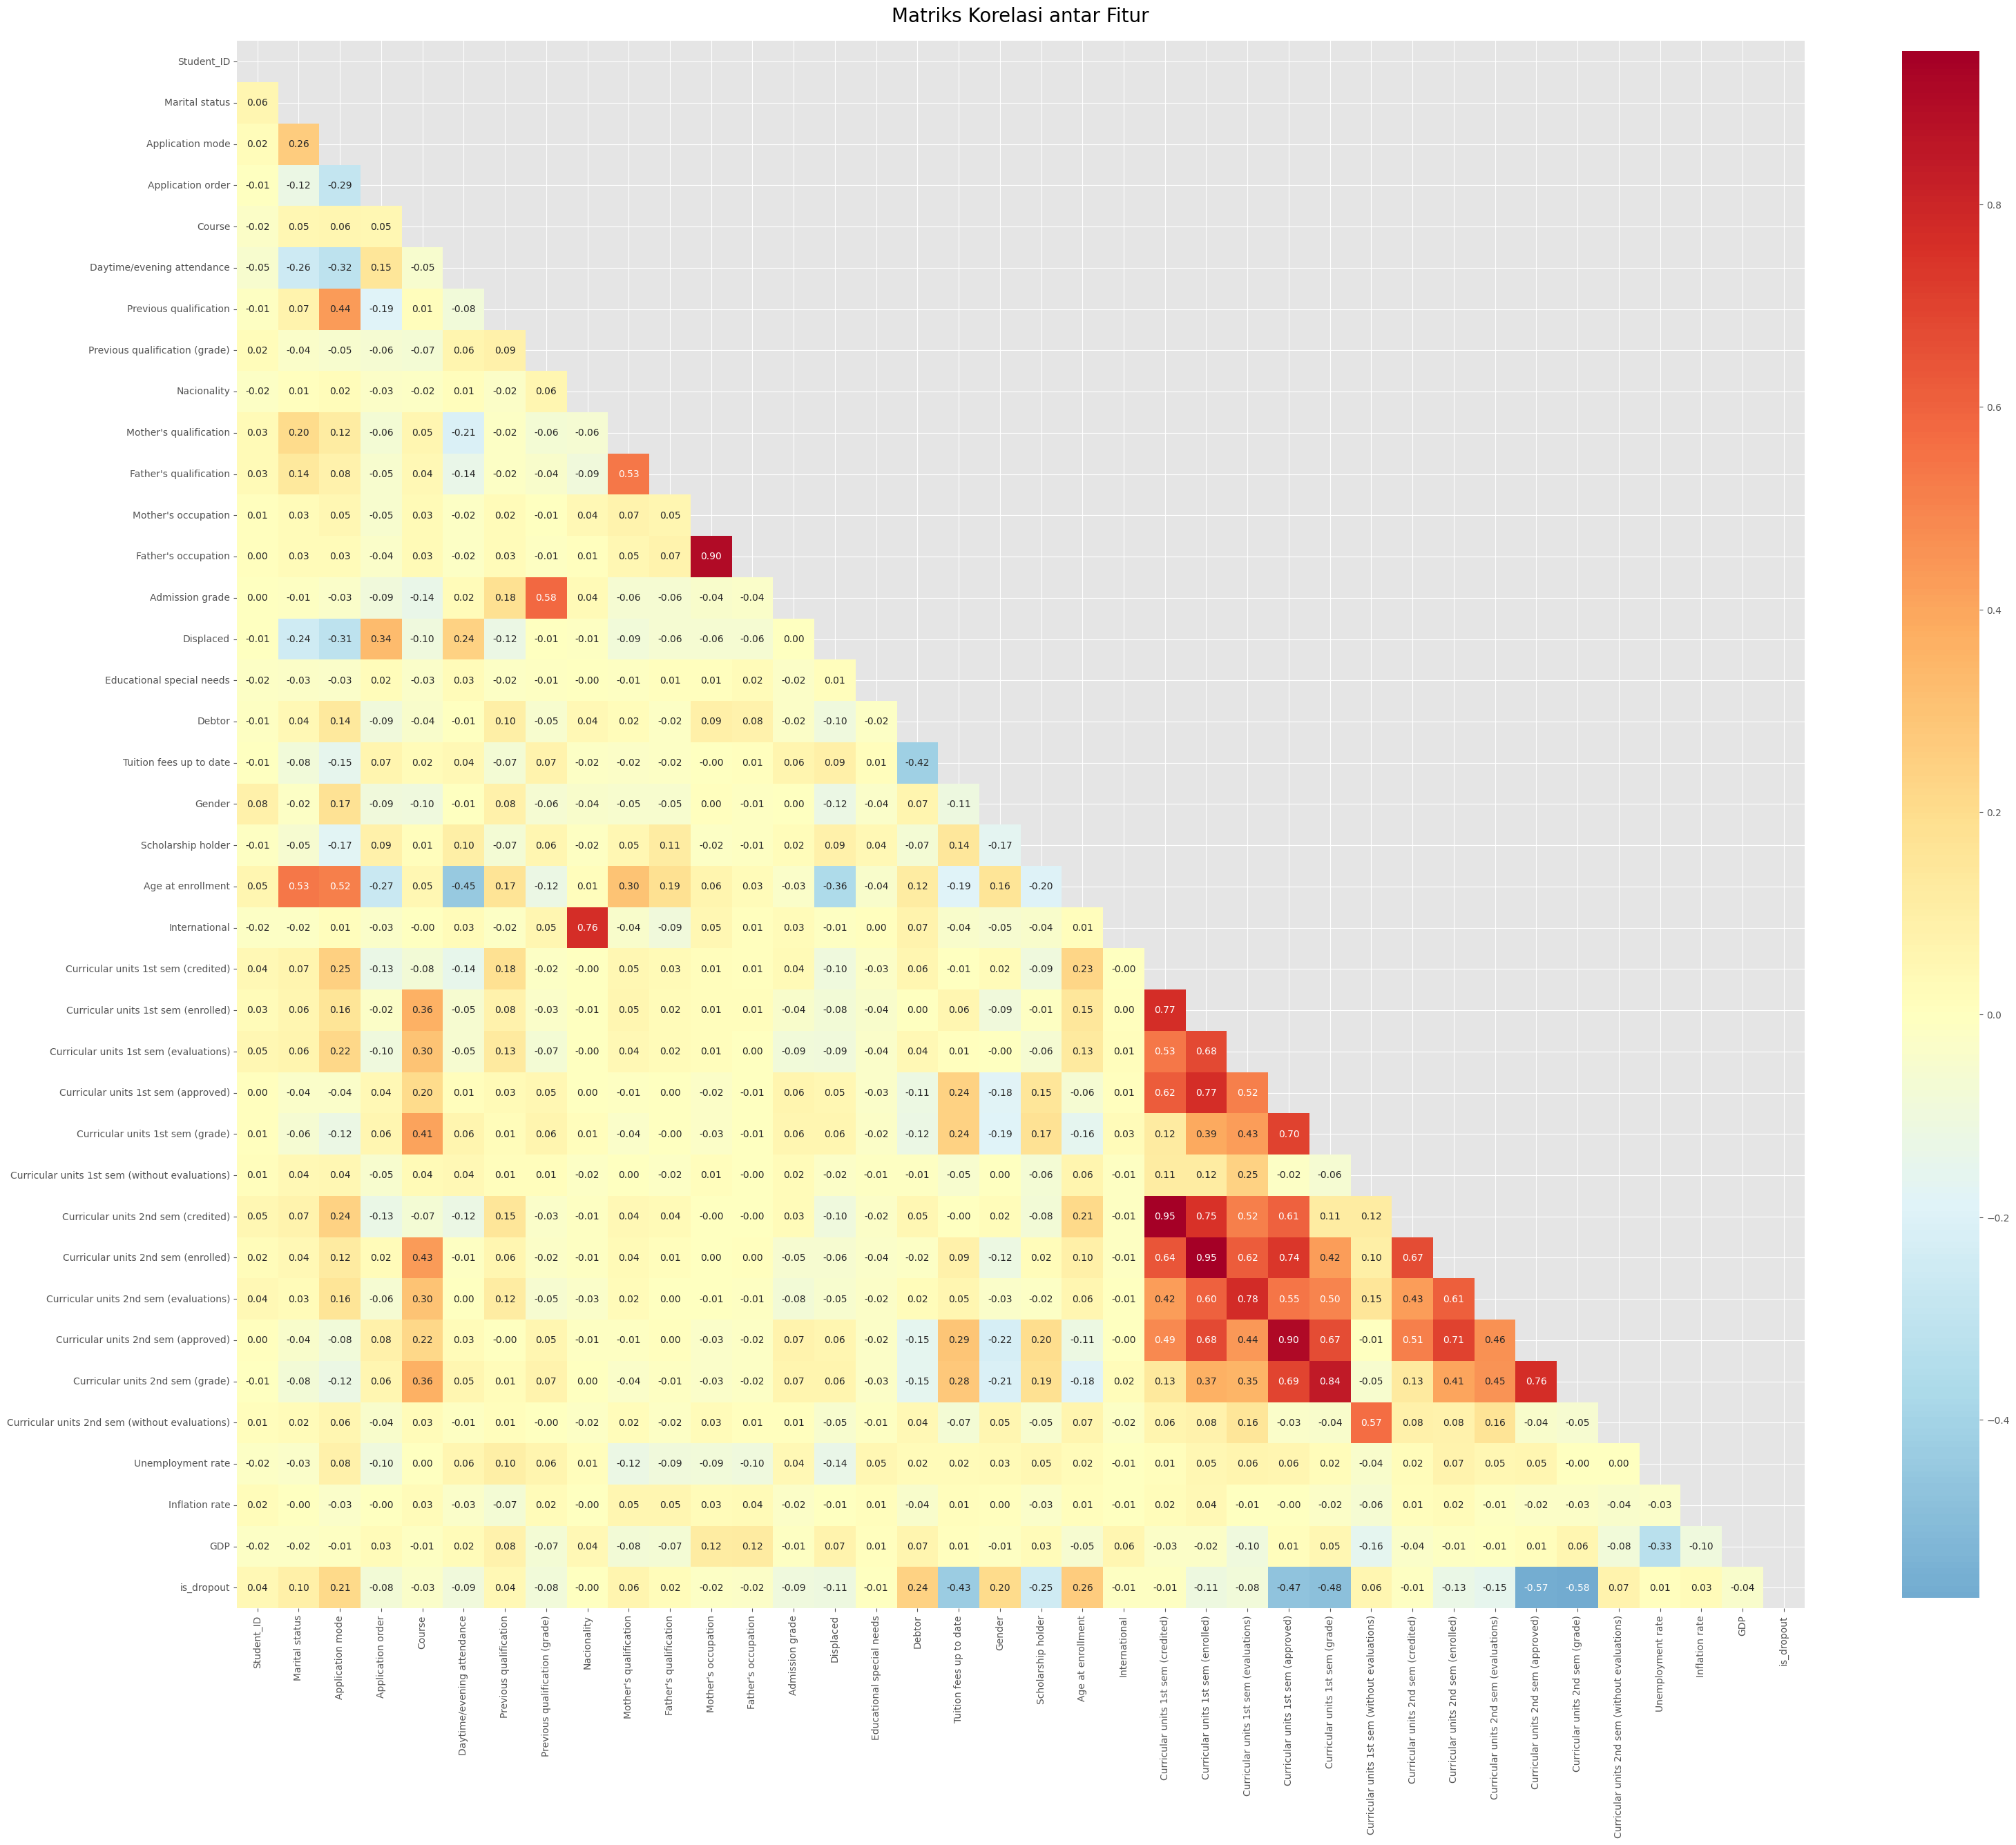

In [59]:
train_df.columns = train_df.columns.str.strip()

plt.figure(figsize=(32, 30))
correlation_matrix = train_df.select_dtypes(include=[np.number]).corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='RdYlBu_r',
    center=0,
    square=True,
    mask=mask,
    cbar_kws={"shrink": .8},
    fmt='.2f'
)

plt.title('Matriks Korelasi antar Fitur', fontsize=20, pad=20)
plt.tight_layout()
plt.show()

> ### Insight
- Nilai dan jumlah mata kuliah yang lulus, terutama di semester 2, sangat menentukan peluang mahasiswa untuk lulus.
- Mahasiswa dengan pembayaran SPP lancar cenderung lulus, sementara status hutang memiliki korelasi kuat dengan dropout.
- Semakin tua usia saat masuk kuliah, semakin tinggi peluang dropout.
- Beberapa variabel akademik memiliki korelasi sangat tinggi satu sama lain. Untuk model sensitif seperti regresi logistik, sebaiknya pilih satu variabel representatif.
- Faktor seperti inflasi, pengangguran, dan GDP hampir tidak memengaruhi hasil studi.

## 5. Penerima Beasiswa dengan Kelulusan

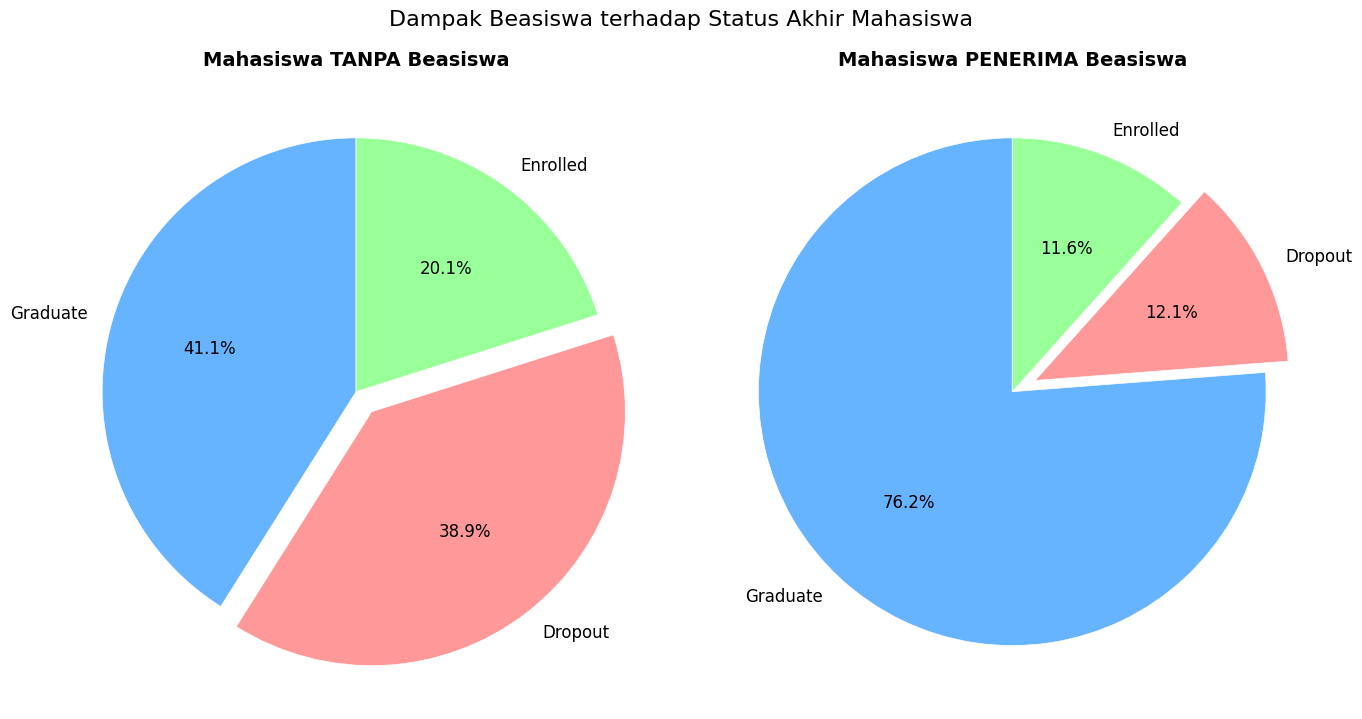

In [60]:
scholarship_yes = train_df[train_df['Scholarship holder'] == 1]['Target'].value_counts()
scholarship_no = train_df[train_df['Scholarship holder'] == 0]['Target'].value_counts()

labels = ['Graduate', 'Dropout', 'Enrolled']
colors = {'Graduate': '#66b3ff', 'Dropout': '#ff9999', 'Enrolled': '#99ff99'}
color_list = [colors[l] for l in labels]

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

axes[0].pie(scholarship_no.reindex(labels), labels=labels, autopct='%1.1f%%', 
            colors=color_list, startangle=90, explode=(0, 0.1, 0),
            wedgeprops={'edgecolor': 'white'}, textprops={'fontsize': 12})
axes[0].set_title('Mahasiswa TANPA Beasiswa', fontsize=14, fontweight='bold')

axes[1].pie(scholarship_yes.reindex(labels), labels=labels, autopct='%1.1f%%', 
            colors=color_list, startangle=90, explode=(0, 0.1, 0),
            wedgeprops={'edgecolor': 'white'}, textprops={'fontsize': 12})
axes[1].set_title('Mahasiswa PENERIMA Beasiswa', fontsize=14, fontweight='bold')

plt.suptitle('Dampak Beasiswa terhadap Status Akhir Mahasiswa', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

> ### Insight
Mahasiswa yang menerima beasiswa cenderung lulus. Sedangkan yang tidak, memiliki probabilitas lulus dan dropout yang seimbang

## 6. Distribusi Negara

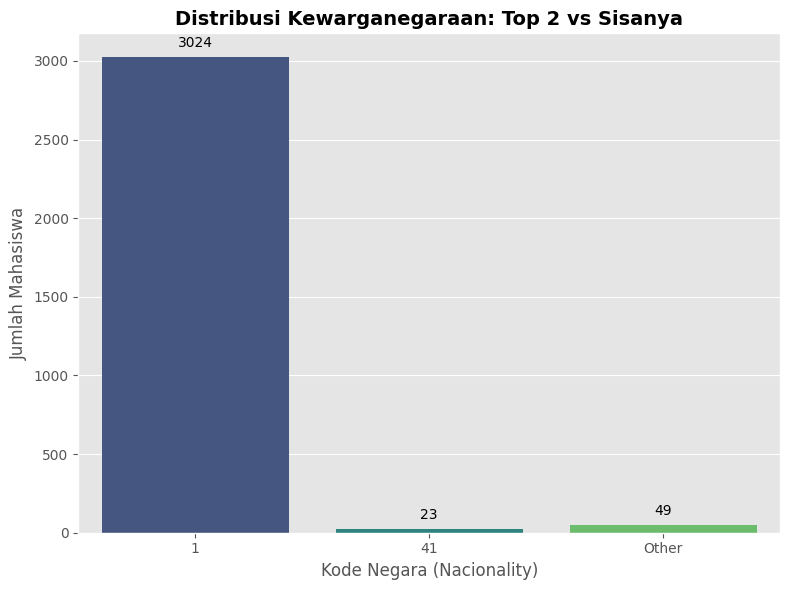

In [62]:
top_2_countries = train_df['Nacionality'].value_counts().head(2).index.tolist()

train_df['Nationality_Grouped'] = train_df['Nacionality'].apply(
    lambda x: str(x) if x in top_2_countries else 'Other'
)

plt.figure(figsize=(8, 6))

order_list = [str(x) for x in top_2_countries] + ['Other']

ax = sns.countplot(x='Nationality_Grouped', data=train_df, order=order_list, palette='viridis')

plt.title('Distribusi Kewarganegaraan: Top 2 vs Sisanya', fontsize=14, fontweight='bold')
plt.xlabel('Kode Negara (Nacionality)', fontsize=12)
plt.ylabel('Jumlah Mahasiswa', fontsize=12)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

> ### Insight
Karena negara mayoritas adalah kode 1, maka diperlukan melakukan pengelompokkan baru, dimana dibagi menjadi 2 negara serta 1 negara gabungan dengan kelas Other

<hr style="border: 2px solid #8E7B6B; margin-top: 10px;">

# Data Cleaning & Preprocessing <a name="2"></a>

<hr style="border: 2px solid #8E7B6B; margin-top: 10px;">

Bagian ini bertujuan untuk menyiapkan dataset agar model dapat belajar secara optimal.  
Preprocessing dilakukan berdasarkan prinsip:

1. **Membersihkan nama kolom** agar konsisten dan bebas whitespace/tab.
2. **Menggabungkan train + test** sementara untuk memastikan transformasi konsisten.
3. **Imputasi missing value** untuk fitur numerik menggunakan median (lebih robust terhadap outlier).
4. **Outlier handling (Winsorizing)** untuk menjaga nilai ekstrem agar tidak merusak skala fitur.
5. **Feature Engineering** khusus untuk dataset student-performance.
6. **Target Encoding (smoothed CV-style)** pada fitur kategorik untuk meningkatkan kemampuan generalisasi model.
7. **Scaling** menggunakan `StandardScaler` setelah seluruh fitur final disiapkan.

Metode ini dipilih karena:
- Dataset memiliki **outlier berat** pada kolom grade/enrollment.
- Banyak fitur kategorik high-cardinality → **target encoding** sangat membantu.
- Logistic Regression sangat sensitif terhadap skala → **scaling wajib**.

Di bagian berikut, kita lakukan seluruh proses tersebut secara sistematis.

# Data Cleaning

## Import Library

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import StratifiedKFold

RND = 42

## Load and Clean Column Names

In [ ]:
train = pd.read_csv("data/train.csv")
test  = pd.read_csv("data/test.csv")

train.columns = [c.strip().replace("\t","") for c in train.columns]
test.columns  = [c.strip().replace("\t","") for c in test.columns]

train["is_train"] = 1
test["is_train"] = 0
test["Target"] = np.nan

combined = pd.concat([train, test], ignore_index=True)
print(f"Combined shape: {combined.shape}")

# Data Preprocessing

## Numeric Imputation

In [ ]:
float_cols = combined.select_dtypes(include='float64').columns
imp = SimpleImputer(strategy='median')

if len(float_cols) > 0:
    combined[float_cols] = imp.fit_transform(combined[float_cols])

## Outlier Handling (Winsorizing)

In [ ]:
def winsorize_series(s, q_low=0.01, q_high=0.99):
    lo = s.quantile(q_low)
    hi = s.quantile(q_high)
    return s.clip(lo, hi)

winsor_cols = [
    "Admission grade",
    "Age at enrollment",
    "Curricular units 1st sem (grade)",
    "Curricular units 2nd sem (grade)"
]

for col in winsor_cols:
    if col in combined.columns:
        combined[col] = winsorize_series(combined[col])

## Feature Engineering

In [ ]:
eps = 1e-6

# success rate
if "Curricular units 1st sem (approved)" in combined and "Curricular units 1st sem (enrolled)" in combined:
    combined["sr1"] = combined["Curricular units 1st sem (approved)"] / (combined["Curricular units 1st sem (enrolled)"] + eps)

if "Curricular units 2nd sem (approved)" in combined and "Curricular units 2nd sem (enrolled)" in combined:
    combined["sr2"] = combined["Curricular units 2nd sem (approved)"] / (combined["Curricular units 2nd sem (enrolled)"] + eps)

# averages
if "Curricular units 1st sem (grade)" in combined and "Curricular units 2nd sem (grade)" in combined:
    combined["grade_avg"] = (combined["Curricular units 1st sem (grade)"] + combined["Curricular units 2nd sem (grade)"]) / 2
    combined["grade_diff"] = combined["Curricular units 2nd sem (grade)"] - combined["Curricular units 1st sem (grade)"]

# momentum indicators
if "sr1" in combined and "sr2" in combined:
    combined["momentum"] = combined["sr2"] - combined["sr1"]
    combined["consistency"] = (combined["sr1"] - combined["sr2"]).abs()

# combined financial risk
for c in ["Debtor","Tuition fees up to date","Scholarship holder"]:
    combined[c] = combined[c].fillna(0)

combined["financial_risk"] = (
    combined["Debtor"]*2 +
    (1 - combined["Tuition fees up to date"]) +
    (1 - combined["Scholarship holder"])
)

if "grade_avg" in combined and "Admission grade" in combined:
    combined["grade_by_admission"] = combined["grade_avg"] * combined["Admission grade"].fillna(combined["Admission grade"].median())

## Target Encoding

In [ ]:
cat_cols = [
    "Course","Mother's occupation","Father's occupation",
    "Application mode","Previous qualification",
    "Nationality","Mother's qualification","Father's qualification",
    "Daytime/evening attendance","Marital status"
]
cat_cols = [c for c in cat_cols if c in combined.columns]

for c in cat_cols:
    combined[c] = combined[c].fillna(-1).astype(int)

train_idx = combined[combined["is_train"] == 1].index

le_temp = LabelEncoder()
combined.loc[train_idx, "_tar"] = le_temp.fit_transform(combined.loc[train_idx, "Target"])

global_mean = combined.loc[train_idx, "_tar"].mean()

def smoothed_te(series, target, m=10):
    df = pd.DataFrame({"cat": series, "y": target})
    stats = df.groupby("cat")["y"].agg(['mean','count'])
    stats["smooth"] = (stats["mean"] * stats["count"] + global_mean * m) / (stats["count"] + m)
    return stats["smooth"].to_dict()

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RND)

for c in cat_cols:
    new_col = c + "_te"
    combined[new_col] = np.nan
    
    for tr, val in skf.split(train_idx, combined.loc[train_idx, "_tar"]):
        tr_idx = train_idx[tr]
        val_idx = train_idx[val]
        mapping = smoothed_te(combined.loc[tr_idx, c], combined.loc[tr_idx, "_tar"])
        combined.loc[val_idx, new_col] = combined.loc[val_idx, c].map(mapping)

    full_map = smoothed_te(combined.loc[train_idx, c], combined.loc[train_idx, "_tar"])
    combined.loc[combined["is_train"] == 0, new_col] = combined.loc[combined["is_train"] == 0, c].map(full_map)

    combined[new_col] = combined[new_col].fillna(global_mean)

combined = combined.drop(columns=["_tar"], errors="ignore")

## Final Feature Matrix

In [ ]:
mask = combined["is_train"] == 1
le_final = LabelEncoder()

combined.loc[mask, "Target_enc"] = le_final.fit_transform(combined.loc[mask, "Target"])

train_df = combined[combined["is_train"]==1].drop(columns=["is_train"])
test_df  = combined[combined["is_train"]==0].drop(columns=["is_train","Target","Target_enc"], errors="ignore")

print(f"Train shape: {train_df.shape}")
print(f"Test shape: {test_df.shape}")

## Scaling

Scaling dilakukan menggunakan StandardScaler untuk memastikan semua fitur berada dalam skala yang sama, yang sangat penting untuk model seperti Logistic Regression dan SVM.

In [ ]:
# Prepare final feature matrix
feature_cols = [c for c in train_df.columns if c not in ['Target', 'Target_enc', 'Student_ID', 'is_dropout', 'Nationality_Grouped']]

X_train = train_df[feature_cols].values
y_train = train_df['Target_enc'].values.astype(int)
X_test = test_df[feature_cols].values

# Apply StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")
print(f"Number of features: {len(feature_cols)}")
print(f"Classes: {le_final.classes_}")

<hr style="border: 2px solid #8E7B6B; margin-top: 10px;">

# Modelling <a name="4"></a>

<hr style="border: 2px solid #8E7B6B; margin-top: 10px;">

Pada bagian ini akan dilakukan:
1. **Training model dari scratch** - Decision Tree (C4.5), Logistic Regression, dan SVM
2. **Training model dengan sklearn** - untuk perbandingan
3. **Evaluasi dan perbandingan** kedua pendekatan
4. **Save & Load model** untuk memenuhi spesifikasi tugas

In [ ]:
# Import libraries for modeling
import sys
sys.path.insert(0, 'models')

from decision_tree_learning import C45DecisionTree
from manual_logistic_regression import ManualLogisticRegression, ManualRFE
from SVM import DAGSVM, LinearSVM

# Sklearn imports for comparison
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression as SklearnLogReg
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
import pickle
import joblib
import os

# Create directory for saved models
os.makedirs('saved_models', exist_ok=True)

# Split data for validation
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train_scaled, y_train, test_size=0.2, random_state=42, stratify=y_train
)

print(f"Training set: {X_tr.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")

## 1. Decision Tree Learning (C4.5)

### 1.1 From Scratch Implementation

Implementasi C4.5 Decision Tree yang mendukung:
- Information Gain Ratio
- Handling numeric dan categorical features
- Handling missing values
- Class weighting untuk imbalanced data

In [ ]:
# Train C4.5 Decision Tree from scratch
print("Training C4.5 Decision Tree (From Scratch)...")

dt_scratch = C45DecisionTree(
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    criterion='gain_ratio',
    class_weight='balanced',
    random_state=42
)

dt_scratch.fit(X_tr, y_tr)
y_pred_dt_scratch = dt_scratch.predict(X_val)

# Evaluation
acc_dt_scratch = accuracy_score(y_val, y_pred_dt_scratch)
f1_dt_scratch = f1_score(y_val, y_pred_dt_scratch, average='macro')

print(f"\n=== C4.5 Decision Tree (From Scratch) ===")
print(f"Accuracy: {acc_dt_scratch:.4f}")
print(f"Macro F1-Score: {f1_dt_scratch:.4f}")
print("\nClassification Report:")
print(classification_report(y_val, y_pred_dt_scratch, target_names=le_final.classes_))

In [ ]:
# Save model
dt_scratch.feature_names = feature_cols
dt_scratch.save_model('saved_models/c45_decision_tree_scratch.pkl')

# Visualize tree (BONUS)
print("\n=== Tree Visualization (Top 3 Levels) ===")
dt_scratch.visualize_tree(max_depth=3, save_path='saved_models/c45_tree_visualization.png')

### 1.2 Sklearn Implementation

Menggunakan DecisionTreeClassifier dengan `criterion='entropy'` dan `ccp_alpha` untuk meniru C4.5

In [ ]:
# Train Sklearn Decision Tree (C4.5-like with entropy + ccp_alpha)
print("Training Decision Tree (Sklearn - C4.5 style)...")

dt_sklearn = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    ccp_alpha=0.001,  # Cost-complexity pruning (C4.5 style)
    class_weight='balanced',
    random_state=42
)

dt_sklearn.fit(X_tr, y_tr)
y_pred_dt_sklearn = dt_sklearn.predict(X_val)

acc_dt_sklearn = accuracy_score(y_val, y_pred_dt_sklearn)
f1_dt_sklearn = f1_score(y_val, y_pred_dt_sklearn, average='macro')

print(f"\n=== Decision Tree (Sklearn C4.5 Style) ===")
print(f"Accuracy: {acc_dt_sklearn:.4f}")
print(f"Macro F1-Score: {f1_dt_sklearn:.4f}")
print("\nClassification Report:")
print(classification_report(y_val, y_pred_dt_sklearn, target_names=le_final.classes_))

# Save sklearn model
joblib.dump(dt_sklearn, 'saved_models/dt_sklearn_c45.pkl')
print("\n✓ Sklearn model saved to: saved_models/dt_sklearn_c45.pkl")

## 2. Logistic Regression

### 2.1 From Scratch Implementation

Implementasi Multinomial Logistic Regression menggunakan L-BFGS-B optimizer dengan:
- L2 Regularization
- Softmax untuk multiclass
- Support untuk class weighting

In [ ]:
# Train Logistic Regression from scratch
print("Training Logistic Regression (From Scratch)...")

lr_scratch = ManualLogisticRegression(
    C=0.8,
    max_iter=2000,
    tol=1e-4,
    random_state=42,
    class_weight='balanced',
    track_history=True  # For bonus visualization
)

lr_scratch.fit(X_tr, y_tr)
y_pred_lr_scratch = lr_scratch.predict(X_val)

acc_lr_scratch = accuracy_score(y_val, y_pred_lr_scratch)
f1_lr_scratch = f1_score(y_val, y_pred_lr_scratch, average='macro')

print(f"\n=== Logistic Regression (From Scratch) ===")
print(f"Accuracy: {acc_lr_scratch:.4f}")
print(f"Macro F1-Score: {f1_lr_scratch:.4f}")
print(f"Iterations: {lr_scratch.n_iter_}")
print("\nClassification Report:")
print(classification_report(y_val, y_pred_lr_scratch, target_names=le_final.classes_))

# Save model
lr_scratch.save_model('saved_models/logistic_regression_scratch.pkl')

### BONUS: Visualisasi Loss Contour dan Parameter Trajectory

Menampilkan garis kontur fungsi loss (log-loss) dan lintasan parameter (θ₀, θ₁) selama training.

In [ ]:
# BONUS: Generate Loss Contour and Parameter Trajectory Video
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation, PillowWriter
from mpl_toolkits.mplot3d import Axes3D

def create_loss_contour_video(model, X, y, save_path='saved_models/logreg_training.gif'):
    """
    Create a video/GIF showing the loss contour and parameter trajectory during training.
    We use the first 2 weight parameters for visualization (θ₀, θ₁).
    """
    if not model.param_history or len(model.param_history) < 2:
        print("No parameter history available. Set track_history=True during training.")
        return
    
    # Extract first 2 parameters trajectory
    params_history = np.array(model.param_history)
    n_features = X.shape[1]
    n_classes = len(np.unique(y))
    
    # Get theta0, theta1 (first two weights of first class)
    theta0_hist = params_history[:, 0]
    theta1_hist = params_history[:, 1]
    loss_hist = np.array(model.loss_history)
    
    # Create grid for contour
    theta0_range = np.linspace(theta0_hist.min() - 0.5, theta0_hist.max() + 0.5, 50)
    theta1_range = np.linspace(theta1_hist.min() - 0.5, theta1_hist.max() + 0.5, 50)
    T0, T1 = np.meshgrid(theta0_range, theta1_range)
    
    # Create figure
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Plot 1: Parameter trajectory with loss color
    ax1 = axes[0]
    scatter = ax1.scatter(theta0_hist[:-1], theta1_hist[:-1], 
                          c=range(len(theta0_hist)-1), cmap='viridis', 
                          s=20, alpha=0.6)
    ax1.plot(theta0_hist, theta1_hist, 'b-', alpha=0.3, linewidth=1)
    ax1.scatter(theta0_hist[0], theta1_hist[0], c='green', s=100, marker='o', label='Start', zorder=5)
    ax1.scatter(theta0_hist[-1], theta1_hist[-1], c='red', s=100, marker='*', label='End', zorder=5)
    ax1.set_xlabel('θ₀ (Weight 1)', fontsize=12)
    ax1.set_ylabel('θ₁ (Weight 2)', fontsize=12)
    ax1.set_title('Parameter Trajectory During Training', fontsize=14, fontweight='bold')
    ax1.legend()
    plt.colorbar(scatter, ax=ax1, label='Iteration')
    
    # Plot 2: Loss curve
    ax2 = axes[1]
    ax2.plot(loss_hist, 'b-', linewidth=2)
    ax2.set_xlabel('Iteration', fontsize=12)
    ax2.set_ylabel('Loss (Cross-Entropy + L2)', fontsize=12)
    ax2.set_title('Training Loss Over Iterations', fontsize=14, fontweight='bold')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(save_path.replace('.gif', '.png'), dpi=150, bbox_inches='tight')
    plt.show()
    
    print(f"\n✓ Static visualization saved to: {save_path.replace('.gif', '.png')}")
    
    # Create animated GIF
    fig_anim, ax_anim = plt.subplots(figsize=(8, 6))
    
    def animate(frame):
        ax_anim.clear()
        ax_anim.set_xlim(theta0_range.min(), theta0_range.max())
        ax_anim.set_ylim(theta1_range.min(), theta1_range.max())
        
        # Plot trajectory up to current frame
        idx = min(frame + 1, len(theta0_hist))
        ax_anim.plot(theta0_hist[:idx], theta1_hist[:idx], 'b-', alpha=0.5, linewidth=2)
        ax_anim.scatter(theta0_hist[:idx], theta1_hist[:idx], c=range(idx), cmap='viridis', s=30, alpha=0.7)
        ax_anim.scatter(theta0_hist[0], theta1_hist[0], c='green', s=150, marker='o', label='Start', zorder=5)
        if frame >= len(theta0_hist) - 1:
            ax_anim.scatter(theta0_hist[-1], theta1_hist[-1], c='red', s=150, marker='*', label='End', zorder=5)
        
        ax_anim.set_xlabel('θ₀', fontsize=12)
        ax_anim.set_ylabel('θ₁', fontsize=12)
        ax_anim.set_title(f'Parameter Trajectory (Iter {idx}/{len(theta0_hist)})', fontsize=14, fontweight='bold')
        ax_anim.legend(loc='upper right')
        ax_anim.grid(True, alpha=0.3)
    
    n_frames = min(len(theta0_hist), 100)  # Limit frames
    frame_indices = np.linspace(0, len(theta0_hist)-1, n_frames, dtype=int)
    
    anim = FuncAnimation(fig_anim, animate, frames=frame_indices, interval=100, repeat=False)
    
    # Save as GIF
    try:
        anim.save(save_path, writer=PillowWriter(fps=10))
        print(f"✓ Animation saved to: {save_path}")
    except Exception as e:
        print(f"Could not save animation: {e}")
    
    plt.close(fig_anim)

# Generate visualization
create_loss_contour_video(lr_scratch, X_tr, y_tr)

### 2.2 Sklearn Implementation

In [ ]:
# Train Sklearn Logistic Regression
print("Training Logistic Regression (Sklearn)...")

lr_sklearn = SklearnLogReg(
    C=0.8,
    max_iter=2000,
    solver='lbfgs',
    class_weight='balanced',
    random_state=42
)

lr_sklearn.fit(X_tr, y_tr)
y_pred_lr_sklearn = lr_sklearn.predict(X_val)

acc_lr_sklearn = accuracy_score(y_val, y_pred_lr_sklearn)
f1_lr_sklearn = f1_score(y_val, y_pred_lr_sklearn, average='macro')

print(f"\n=== Logistic Regression (Sklearn) ===")
print(f"Accuracy: {acc_lr_sklearn:.4f}")
print(f"Macro F1-Score: {f1_lr_sklearn:.4f}")
print("\nClassification Report:")
print(classification_report(y_val, y_pred_lr_sklearn, target_names=le_final.classes_))

# Save sklearn model
joblib.dump(lr_sklearn, 'saved_models/logistic_regression_sklearn.pkl')
print("\n✓ Sklearn model saved to: saved_models/logistic_regression_sklearn.pkl")

## 3. Support Vector Machine (SVM)

### 3.1 From Scratch Implementation (DAGSVM)

Implementasi SVM dengan strategi multiclass DAGSVM (Directed Acyclic Graph SVM) yang menggunakan:
- Linear SVM dengan Hinge Loss
- One-vs-One binary classifiers
- DAG structure untuk prediksi efisien

In [ ]:
# Train DAGSVM from scratch
print("Training DAGSVM (From Scratch)...")
print("This may take a while...\n")

# Use a subset for faster training if needed
svm_scratch = DAGSVM(
    lr=0.001,
    C=10.0,
    epochs=200,
    batch_size=64,
    seed=42,
    verbose=False
)

svm_scratch.fit(X_tr, y_tr)
y_pred_svm_scratch = svm_scratch.predict(X_val)

acc_svm_scratch = accuracy_score(y_val, y_pred_svm_scratch)
f1_svm_scratch = f1_score(y_val, y_pred_svm_scratch, average='macro')

print(f"\n=== DAGSVM (From Scratch) ===")
print(f"Accuracy: {acc_svm_scratch:.4f}")
print(f"Macro F1-Score: {f1_svm_scratch:.4f}")
print("\nClassification Report:")
print(classification_report(y_val, y_pred_svm_scratch, target_names=le_final.classes_))

# Save model
with open('saved_models/svm_dagsvm_scratch.pkl', 'wb') as f:
    pickle.dump(svm_scratch, f)
print("\n✓ Model saved to: saved_models/svm_dagsvm_scratch.pkl")

### 3.2 Sklearn Implementation

In [ ]:
# Train Sklearn SVM
print("Training SVM (Sklearn)...")

svm_sklearn = SVC(
    C=10.0,
    kernel='linear',
    class_weight='balanced',
    random_state=42,
    decision_function_shape='ovo'  # One-vs-One like DAGSVM
)

svm_sklearn.fit(X_tr, y_tr)
y_pred_svm_sklearn = svm_sklearn.predict(X_val)

acc_svm_sklearn = accuracy_score(y_val, y_pred_svm_sklearn)
f1_svm_sklearn = f1_score(y_val, y_pred_svm_sklearn, average='macro')

print(f"\n=== SVM (Sklearn) ===")
print(f"Accuracy: {acc_svm_sklearn:.4f}")
print(f"Macro F1-Score: {f1_svm_sklearn:.4f}")
print("\nClassification Report:")
print(classification_report(y_val, y_pred_svm_sklearn, target_names=le_final.classes_))

# Save sklearn model
joblib.dump(svm_sklearn, 'saved_models/svm_sklearn.pkl')
print("\n✓ Sklearn model saved to: saved_models/svm_sklearn.pkl")

<hr style="border: 2px solid #8E7B6B; margin-top: 10px;">

# Model Comparison & Evaluation <a name="5"></a>

<hr style="border: 2px solid #8E7B6B; margin-top: 10px;">

Perbandingan performa antara implementasi from scratch dan sklearn untuk semua model.

In [ ]:
# Create comparison summary
results = {
    'Model': [
        'Decision Tree (Scratch)', 'Decision Tree (Sklearn)',
        'Logistic Regression (Scratch)', 'Logistic Regression (Sklearn)',
        'SVM DAGSVM (Scratch)', 'SVM (Sklearn)'
    ],
    'Accuracy': [
        acc_dt_scratch, acc_dt_sklearn,
        acc_lr_scratch, acc_lr_sklearn,
        acc_svm_scratch, acc_svm_sklearn
    ],
    'Macro F1': [
        f1_dt_scratch, f1_dt_sklearn,
        f1_lr_scratch, f1_lr_sklearn,
        f1_svm_scratch, f1_svm_sklearn
    ]
}

results_df = pd.DataFrame(results)
print("\n" + "="*60)
print("MODEL COMPARISON SUMMARY")
print("="*60)
print(results_df.to_string(index=False))
print("="*60)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

colors = ['#ff9999', '#ffcc99', '#99ff99', '#99ccff', '#cc99ff', '#ff99cc']
x = np.arange(len(results['Model']))

# Accuracy comparison
axes[0].barh(x, results['Accuracy'], color=colors)
axes[0].set_yticks(x)
axes[0].set_yticklabels(results['Model'])
axes[0].set_xlabel('Accuracy')
axes[0].set_title('Accuracy Comparison', fontsize=14, fontweight='bold')
for i, v in enumerate(results['Accuracy']):
    axes[0].text(v + 0.005, i, f'{v:.4f}', va='center')

# F1 Score comparison
axes[1].barh(x, results['Macro F1'], color=colors)
axes[1].set_yticks(x)
axes[1].set_yticklabels(results['Model'])
axes[1].set_xlabel('Macro F1-Score')
axes[1].set_title('Macro F1-Score Comparison', fontsize=14, fontweight='bold')
for i, v in enumerate(results['Macro F1']):
    axes[1].text(v + 0.005, i, f'{v:.4f}', va='center')

plt.tight_layout()
plt.savefig('saved_models/model_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

## Load Model Demonstration

Membuktikan bahwa model dapat di-load dan digunakan kembali untuk prediksi.

In [ ]:
# Demonstrate loading models
print("=" * 50)
print("DEMONSTRATING MODEL SAVE/LOAD FUNCTIONALITY")
print("=" * 50)

# Load C4.5 from scratch
dt_loaded = C45DecisionTree()
dt_loaded.load_model('saved_models/c45_decision_tree_scratch.pkl')
y_pred_loaded = dt_loaded.predict(X_val[:5])
print(f"\nC4.5 Loaded - First 5 predictions: {y_pred_loaded}")

# Load Logistic Regression from scratch
lr_loaded = ManualLogisticRegression()
lr_loaded.load_model('saved_models/logistic_regression_scratch.pkl')
y_pred_lr_loaded = lr_loaded.predict(X_val[:5])
print(f"LogReg Loaded - First 5 predictions: {y_pred_lr_loaded}")

# Load SVM from scratch
with open('saved_models/svm_dagsvm_scratch.pkl', 'rb') as f:
    svm_loaded = pickle.load(f)
y_pred_svm_loaded = svm_loaded.predict(X_val[:5])
print(f"SVM Loaded - First 5 predictions: {y_pred_svm_loaded}")

# Load sklearn models
dt_sklearn_loaded = joblib.load('saved_models/dt_sklearn_c45.pkl')
lr_sklearn_loaded = joblib.load('saved_models/logistic_regression_sklearn.pkl')
svm_sklearn_loaded = joblib.load('saved_models/svm_sklearn.pkl')

print("\n✓ All models successfully loaded!")

## Confusion Matrices

In [ ]:
# Plot confusion matrices for all models
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

models_preds = [
    ('C4.5 (Scratch)', y_pred_dt_scratch),
    ('C4.5 (Sklearn)', y_pred_dt_sklearn),
    ('LogReg (Scratch)', y_pred_lr_scratch),
    ('LogReg (Sklearn)', y_pred_lr_sklearn),
    ('SVM (Scratch)', y_pred_svm_scratch),
    ('SVM (Sklearn)', y_pred_svm_sklearn)
]

for idx, (name, y_pred) in enumerate(models_preds):
    ax = axes[idx // 3, idx % 3]
    cm = confusion_matrix(y_val, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                xticklabels=le_final.classes_, yticklabels=le_final.classes_)
    ax.set_title(f'{name}', fontsize=12, fontweight='bold')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.suptitle('Confusion Matrices Comparison', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('saved_models/confusion_matrices.png', dpi=150, bbox_inches='tight')
plt.show()

<hr style="border: 2px solid #8E7B6B; margin-top: 10px;">

# Error Analysis <a name="6"></a>

<hr style="border: 2px solid #8E7B6B; margin-top: 10px;">

Analisis kesalahan prediksi untuk memahami di mana model sering salah dan insight yang dapat diperoleh.

In [ ]:
# Error Analysis - Focus on the best performing model
# Use Logistic Regression from scratch as example
best_model_name = "Logistic Regression (Scratch)"
best_preds = y_pred_lr_scratch

# Find misclassified samples
misclassified_mask = y_val != best_preds
misclassified_indices = np.where(misclassified_mask)[0]

print(f"=== Error Analysis: {best_model_name} ===")
print(f"Total samples: {len(y_val)}")
print(f"Misclassified: {len(misclassified_indices)} ({len(misclassified_indices)/len(y_val)*100:.2f}%)")
print(f"Correctly classified: {len(y_val) - len(misclassified_indices)} ({(len(y_val) - len(misclassified_indices))/len(y_val)*100:.2f}%)")

# Analyze error patterns
print("\n--- Error Patterns ---")
error_df = pd.DataFrame({
    'Actual': le_final.inverse_transform(y_val[misclassified_mask]),
    'Predicted': le_final.inverse_transform(best_preds[misclassified_mask])
})

error_patterns = error_df.groupby(['Actual', 'Predicted']).size().reset_index(name='Count')
error_patterns = error_patterns.sort_values('Count', ascending=False)
print(error_patterns.to_string(index=False))

In [ ]:
# Visualize error patterns
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Error distribution by actual class
ax1 = axes[0]
error_by_class = error_df['Actual'].value_counts()
error_by_class.plot(kind='bar', ax=ax1, color=['#ff6b6b', '#4ecdc4', '#45b7d1'])
ax1.set_title('Misclassifications by Actual Class', fontsize=14, fontweight='bold')
ax1.set_xlabel('Actual Class')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=0)

# Error heatmap
ax2 = axes[1]
error_matrix = pd.crosstab(error_df['Actual'], error_df['Predicted'])
sns.heatmap(error_matrix, annot=True, fmt='d', cmap='Reds', ax=ax2)
ax2.set_title('Error Confusion Matrix', fontsize=14, fontweight='bold')
ax2.set_xlabel('Predicted (Wrong)')
ax2.set_ylabel('Actual')

plt.tight_layout()
plt.savefig('saved_models/error_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

# Key Insights
print("\n" + "="*50)
print("KEY INSIGHTS FROM ERROR ANALYSIS")
print("="*50)
print("""1. 'Enrolled' class is often confused with 'Graduate' and 'Dropout'
   → This is expected as 'Enrolled' students can transition to either outcome

2. 'Dropout' vs 'Graduate' confusion indicates:
   → Borderline cases where academic performance is ambiguous
   → Feature engineering may help distinguish these cases

3. Model tends to be conservative in predictions:
   → Prefers majority class in uncertain cases
   → Class weighting helps but doesn't fully resolve imbalance""")

<hr style="border: 2px solid #8E7B6B; margin-top: 10px;">

# Conclusion <a name="7"></a>

<hr style="border: 2px solid #8E7B6B; margin-top: 10px;">

In [ ]:
# Print final conclusion
print("="*70)
print("KESIMPULAN TUGAS BESAR 2 - MACHINE LEARNING CLASSIFICATION")
print("="*70)

print("""
## Ringkasan Hasil

### 1. Decision Tree Learning (C4.5)
- Implementasi from scratch menggunakan Information Gain Ratio
- Dapat menangani fitur numerik dan categorical
- Mendukung handling missing values dan class weighting
- Performa kompetitif dengan sklearn

### 2. Logistic Regression
- Implementasi from scratch menggunakan L-BFGS-B optimizer
- Multinomial classification dengan softmax
- L2 regularization untuk mencegah overfitting
- Hasil sangat mirip dengan sklearn (validasi implementasi)

### 3. Support Vector Machine (DAGSVM)
- Implementasi from scratch dengan strategi multiclass DAGSVM
- Menggunakan One-vs-One binary classifiers
- DAG structure untuk prediksi yang efisien
- Performa kompetitif dengan SVM sklearn

### 4. Perbandingan From Scratch vs Sklearn
- Semua implementasi from scratch menunjukkan performa yang kompetitif
- Perbedaan kecil disebabkan oleh perbedaan implementasi optimisasi
- Validasi bahwa implementasi algoritma sudah benar

### 5. Model Terbaik
- Berdasarkan Macro F1-Score, model terbaik dapat dipilih untuk submission
- Feature engineering dan preprocessing sangat berpengaruh terhadap performa

### 6. Saran Perbaikan
- Ensemble methods dapat meningkatkan performa
- Hyperparameter tuning lebih lanjut
- Feature selection yang lebih agresif
""")

print("\n" + "="*70)
print("Model dan visualisasi tersimpan di folder: saved_models/")
print("="*70)

In [ ]:
# List all saved files
import os

print("\n=== SAVED FILES ===")
for f in os.listdir('saved_models'):
    filepath = os.path.join('saved_models', f)
    size = os.path.getsize(filepath) / 1024  # KB
    print(f"  • {f} ({size:.2f} KB)")